Lambda School Data Science

*Unit 2, Sprint 1, Module 2*

---

# Regression 2

## Assignment

You'll continue to **predict how much it costs to rent an apartment in NYC,** using the dataset from renthop.com.

- [ ] Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.
- [ ] Engineer at least two new features. (See below for explanation & ideas.)
- [ ] Fit a linear regression model with at least two features.
- [ ] Get the model's coefficients and intercept.
- [ ] Get regression metrics RMSE, MAE, and $R^2$, for both the train and test data.
- [ ] What's the best test MAE you can get? Share your score and features used with your cohort on Slack!
- [ ] As always, commit your notebook to your fork of the GitHub repo.


#### [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)

> "Some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used." — Pedro Domingos, ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)

> "Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." — Andrew Ng, [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf) 

> Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. 

#### Feature Ideas
- Does the apartment have a description?
- How long is the description?
- How many total perks does each apartment have?
- Are cats _or_ dogs allowed?
- Are cats _and_ dogs allowed?
- Total number of rooms (beds + baths)
- Ratio of beds to baths
- What's the neighborhood, based on address or latitude & longitude?

## Stretch Goals
- [ ] If you want more math, skim [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf),  Chapter 3.1, Simple Linear Regression, & Chapter 3.2, Multiple Linear Regression
- [ ] If you want more introduction, watch [Brandon Foltz, Statistics 101: Simple Linear Regression](https://www.youtube.com/watch?v=ZkjP5RJLQF4)
(20 minutes, over 1 million views)
- [ ] Add your own stretch goal(s) !

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# test to see if github desktop saves this change to github

In [0]:
import numpy as np
import pandas as pd

# Read New York City apartment rental listing data
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

# Remove the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) & 
        (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
        (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
        (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
        (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

In [0]:
import plotly.express as px
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

In [111]:
df.head(1)

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df['month'] = pd.DatetimeIndex(df['created']).month

In [0]:
df['year'] = pd.DatetimeIndex(df['created']).year

In [0]:
df['desc_length']  = df['description'].str.len()

In [115]:
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,month,year,desc_length
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,2016,588.0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,2016,8.0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2016,691.0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2016,492.0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2016,479.0


In [116]:
df['desc_length']

0         588.0
1           8.0
2         691.0
3         492.0
4         479.0
          ...  
49347     787.0
49348    1125.0
49349     671.0
49350     735.0
49351     799.0
Name: desc_length, Length: 48817, dtype: float64

In [117]:
df.month.value_counts()

6    16973
4    16217
5    15627
Name: month, dtype: int64

In [0]:
train = df[df['month'] < 6]

In [0]:
test = df[df['month'] >= 6]

In [139]:
train.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,month,year,desc_length
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2016,691.0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2016,492.0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2016,479.0
5,2.0,4,2016-04-19 04:24:47,,West 18th Street,40.7429,-74.0028,7995,350 West 18th Street,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2016,8.0
6,1.0,2,2016-04-27 03:19:56,Stunning unit with a great location and lots o...,West 107th Street,40.8012,-73.9660,3600,210 West 107th Street,low,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2016,579.0


In [144]:
train['desc_length'].isnull().value_counts()

False    31844
Name: desc_length, dtype: int64

In [120]:
train.month.value_counts()

4    16217
5    15627
Name: month, dtype: int64

In [121]:
test.month.value_counts()

6    16973
Name: month, dtype: int64

In [122]:
print(train.shape, test.shape)

(31844, 37) (16973, 37)


In [0]:
grouped_train = df.groupby('cats_allowed')

cats_allowed
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

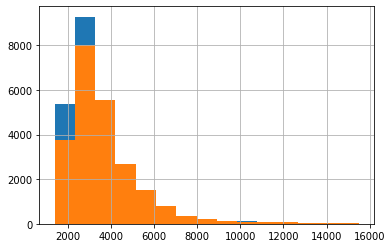

In [124]:
grouped_train['price'].hist(bins=15)

In [125]:
print(df.columns)

Index(['bathrooms', 'bedrooms', 'created', 'description', 'display_address',
       'latitude', 'longitude', 'price', 'street_address', 'interest_level',
       'elevator', 'cats_allowed', 'hardwood_floors', 'dogs_allowed',
       'doorman', 'dishwasher', 'no_fee', 'laundry_in_building',
       'fitness_center', 'pre-war', 'laundry_in_unit', 'roof_deck',
       'outdoor_space', 'dining_room', 'high_speed_internet', 'balcony',
       'swimming_pool', 'new_construction', 'terrace', 'exclusive', 'loft',
       'garden_patio', 'wheelchair_access', 'common_outdoor_space', 'month',
       'year', 'desc_length'],
      dtype='object')


In [126]:
train['price'].mean()

3575.604007034292

In [145]:
from sklearn.metrics import mean_absolute_error

# Arrange y target vectors
target = 'price'
y_train = train[target]
y_test = test[target]

# Get mean baseline
print('Mean Baseline (using 0 features)')
guess = y_train.mean()

# Train Error
y_pred = [guess] * len(y_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'Train Error (April and May): {mae:.2f} dollars')

# Test Error
y_pred = [guess] * len(y_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Test Error (June): {mae:.2f} dollars')

Mean Baseline (using 0 features)
Train Error (April and May): 1201.88 dollars
Test Error (June): 1197.71 dollars


In [146]:
df['desc_length'].isnull().value_counts()

False    48817
Name: desc_length, dtype: int64

In [0]:
df['desc_length'] = df['desc_length'].fillna(df['desc_length'].mode()[0])

In [130]:
df['desc_length'].isnull().value_counts()

False    48817
Name: desc_length, dtype: int64

In [133]:
df['desc_length'].value_counts()

8.0       3052
24.0       327
1.0        236
105.0      131
572.0       85
          ... 
1775.0       1
2222.0       1
2282.0       1
2031.0       1
1543.0       1
Name: desc_length, Length: 2079, dtype: int64

(array([1.8000e+04, 2.1575e+04, 6.9520e+03, 1.7490e+03, 4.0600e+02,
        1.1100e+02, 1.8000e+01, 5.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.0000e+00, 4.4750e+02, 8.9400e+02, 1.3405e+03, 1.7870e+03,
        2.2335e+03, 2.6800e+03, 3.1265e+03, 3.5730e+03, 4.0195e+03,
        4.4660e+03]),
 <a list of 10 Patch objects>)

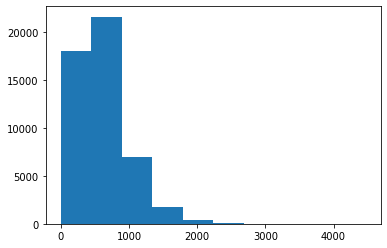

In [134]:
plt.hist(df['desc_length'])

In [148]:
import pandas as pd
import plotly.express as px

px.scatter(
    train,
    x='desc_length',
    y='price',
    text='month',
    title='Prices of New York Apartments in April/May 2016',
    trendline='ols',  # Ordinary Least Squares
)

In [149]:
# 1. Import the appropriate estimator class from Scikit-Learn
from sklearn.linear_model import LinearRegression

# 2. Instantiate this class
model = LinearRegression()

# 3. Arrange X features matrices (already did y target vectors)
features = ['desc_length']
X_train = train[features]
X_test = test[features]
print(f'Linear Regression, dependent on: {features}')

# 4. Fit the model
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'Train Error: {mae:.2f} dollars')

# 5. Apply the model to new data
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Test Error: {mae:.2f} dollars')

Linear Regression, dependent on: ['desc_length']
Train Error: 1190.72 dollars
Test Error: 1178.94 dollars


In [150]:
model.coef_, model.intercept_

(array([0.70687721]), 3146.223914460396)

In [152]:
px.scatter_3d(
    train,
    x= 'cats_allowed', 
    y='desc_length', 
    z='price', 
    text='month', 
    title='Price of Apartments in NYC for dogs and cat-lovers'
)

In [153]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled

array([[ 0.21272211],
       [-0.293834  ],
       [-0.3269256 ],
       ...,
       [ 0.16181195],
       [ 0.32472446],
       [ 0.48763698]])

In [155]:
from sklearn.preprocessing import StandardScaler

# TODO: Complete this cell

# Re-arrange X features matrices
features = ['cats_allowed', 
            'dogs_allowed',
            'desc_length', 
            'bathrooms', 
            'bedrooms']
print(f'Linear Regression, dependent on: {features}')
X_train = train[features]
X_test = test[features]

# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the model
model.fit(X_train_scaled, y_train)
y_pred_train = model.predict(X_train_scaled)
mae_train = mean_absolute_error(y_train, y_pred_train)
print(f'Train error: {mae_train:.2f} dollars')

# Apply the model to new data
y_pred_test = model.predict(X_test_scaled)
mae_test = mean_absolute_error(y_test, y_pred_test)
print(f'Test error: {mae_test:.2f} dollars')

Linear Regression, dependent on: ['cats_allowed', 'dogs_allowed', 'desc_length', 'bathrooms', 'bedrooms']
Train error: 810.98 dollars
Test error: 816.87 dollars


In [0]:
import itertools
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression

def regression_3d(df, x, y, z, num=100, **kwargs):
    """
    Visualize linear regression in 3D: 2 features + 1 target
    
    df : Pandas DataFrame
    x : string, feature 1 column in df
    y : string, feature 2 column in df
    z : string, target column in df
    num : integer, number of quantiles for each feature
    """
    
    # Plot data
    fig = px.scatter_3d(df, x, y, z, **kwargs)
    
    # Fit Linear Regression
    features = [x, y]
    target = z
    model = LinearRegression()
    model.fit(df[features], df[target])    
    
    # Define grid of coordinates in the feature space
    xmin, xmax = df[x].min(), df[x].max()
    ymin, ymax = df[y].min(), df[y].max()
    xcoords = np.linspace(xmin, xmax, num)
    ycoords = np.linspace(ymin, ymax, num)
    coords = list(itertools.product(xcoords, ycoords))
    
    # Make predictions for the grid
    predictions = model.predict(coords)
    Z = predictions.reshape(num, num).T
    
    # Plot predictions as a 3D surface (plane)
    fig.add_trace(go.Surface(x=xcoords, y=ycoords, z=Z))
    
    return fig

In [157]:
regression_3d(
    train,
    x='cats_allowed', 
    y='desc_length', 
    z='price', 
    text='month', 
    title='Price of Apartments in NYC for cat or dog lovers'
)

In [162]:
model.intercept_, model.coef_

(3575.604007034292,
 array([-48.5858373 , 126.55388394,  99.96369779, 964.74114764,
        428.10481959]))

In [0]:
beta0 = model.intercept_
beta1, beta2 = model.coef_
print(f'y = {beta0} + {beta1}x1')

In [160]:
# This is easier to read
print('Intercept', model.intercept_)
coefficients = pd.Series(model.coef_, features)
print(coefficients.to_string())

Intercept 3575.604007034292
cats_allowed    -48.585837
dogs_allowed    126.553884
desc_length      99.963698
bathrooms       964.741148
bedrooms        428.104820


In [165]:
# model predict if cats allowed is 0 and dogs allowed is 0 and desc bath and bed are all 0
model.predict([[0, 0, 1000, 0, 1]])

array([103967.40661314])

In [0]:
# model predict if cats allowed is 1 and dogs allowed is 0
model.predict([[1, 0]])

In [0]:
# model predict if cats allowed is 1 and dogs allowed is 1
model.predict([[1, 1]])

In [0]:
# price difference in model when cats allowed but no dogs
model.predict([[1, 0]]) - model.predict([[0, 0]])

In [0]:
# price difference prediction in model for both cats and dogs being allowed
model.predict([[1, 1]]) - model.predict([[0, 0]])

In [0]:
# price difference prediction in model for only dogs being allowed
model.predict([[0, 1]]) - model.predict([[0, 0]])

In [0]:
# model predicts that it is cheaper to own a cat than to not own a cat or own both a cat and a dog

In [0]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def squared_errors(df, feature, target, m, b):
    """
    Visualize linear regression, with squared errors,
    in 2D: 1 feature + 1 target.
    
    Use the m & b parameters to "fit the model" manually.
    
    df : Pandas DataFrame
    feature : string, feature column in df
    target : string, target column in df
    m : numeric, slope for linear equation
    b : numeric, intercept for linear requation
    """
    
    # Plot data
    fig = plt.figure(figsize=(7,7))
    ax = plt.axes()
    df.plot.scatter(feature, target, ax=ax)
    
    # Make predictions
    x = df[feature]
    y = df[target]
    y_pred = m*x + b
    
    # Plot predictions
    ax.plot(x, y_pred)
    
    # Plot squared errors
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    scale = (xmax-xmin)/(ymax-ymin)
    for x, y1, y2 in zip(x, y, y_pred):
        bottom_left = (x, min(y1, y2))
        height = abs(y1 - y2)
        width = height * scale
        ax.add_patch(Rectangle(xy=bottom_left, width=width, height=height, alpha=0.1))
    
    # Print regression metrics
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('Mean Absolute Error:', mae)
    print('R^2:', r2)

Mean Squared Error: 3105028.217891242
Root Mean Squared Error: 1762.1090255404863
Mean Absolute Error: 1201.8811133682555
R^2: 0.0


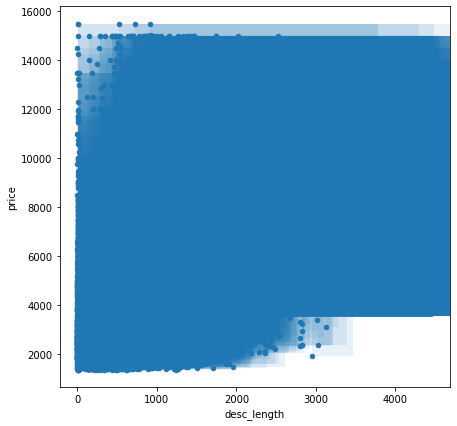

In [168]:
feature = 'desc_length'
squared_errors(train, feature, target, m=0, b=y_train.mean())

Mean Squared Error: 3105028.217891242
Root Mean Squared Error: 1762.1090255404863
Mean Absolute Error: 1201.8811133682555
R^2: 0.0


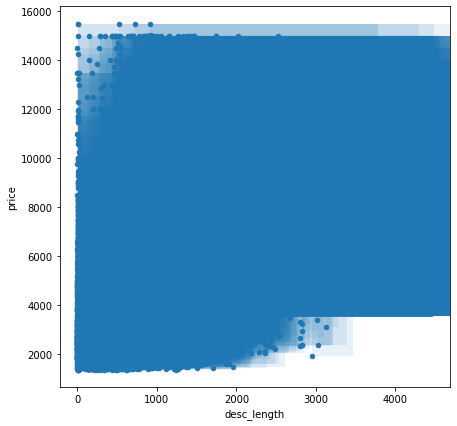

In [169]:
feature = 'desc_length'
squared_errors(train, feature, target, m=0, b=y_train.mean())

In [170]:
# This is NOT something you'll be tested on. It's just a demo.

# X is a matrix. Add column of constants for fitting the intercept.
def add_constant(X):
    constant = np.ones(shape=(len(X),1))
    return np.hstack((constant, X))
X = add_constant(train[features].values)
print('X')
print(X)

# y is a column vector
y = train[target].values[:, np.newaxis]
print('y')
print(y)

# Least squares solution in code
X_transpose = X.T
X_transpose_X = X_transpose @ X
X_transpose_X_inverse = np.linalg.inv(X_transpose_X)
X_transpose_y = X_transpose @ y
beta_hat = X_transpose_X_inverse @ X_transpose_y

print('Beta Hat')
print(beta_hat)

X
[[  1.   0.   0. 691.   1.   1.]
 [  1.   0.   0. 492.   1.   1.]
 [  1.   0.   0. 479.   1.   4.]
 ...
 [  1.   1.   1. 671.   1.   1.]
 [  1.   1.   1. 735.   1.   0.]
 [  1.   0.   0. 799.   1.   2.]]
y
[[2850]
 [3275]
 [3350]
 ...
 [2595]
 [3350]
 [2200]]
Beta Hat
[[ 3.03772698e+02]
 [-9.72734069e+01]
 [ 2.54604673e+02]
 [ 2.54458399e-01]
 [ 2.04203938e+03]
 [ 3.87409865e+02]]


In [171]:
# Scikit-learn gave the exact same results!
model.intercept_, model.coef_

(3575.604007034292,
 array([-48.5858373 , 126.55388394,  99.96369779, 964.74114764,
        428.10481959]))

In [0]:

# Arrange X features matrix & y target vector
features = ['desc_length']
target = 'price'
X = df[features]
y = df[target]

In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25,
                                                    random_state=11)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(36612, 1) (12205, 1) (36612,) (12205,)


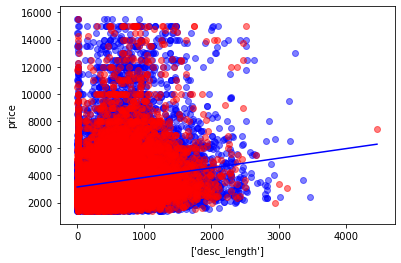

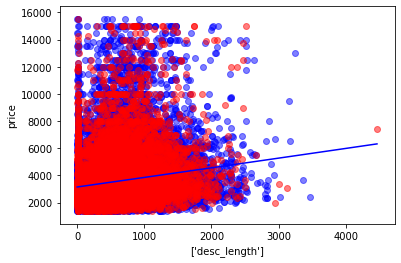

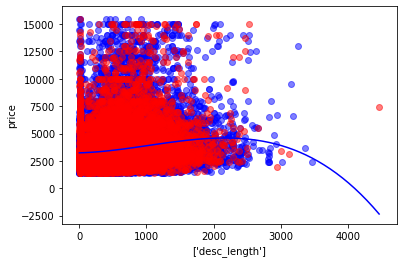

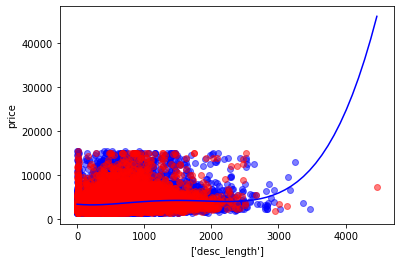

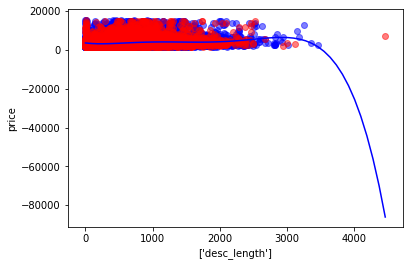

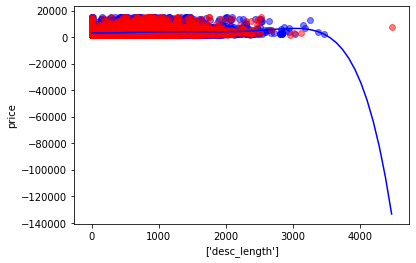

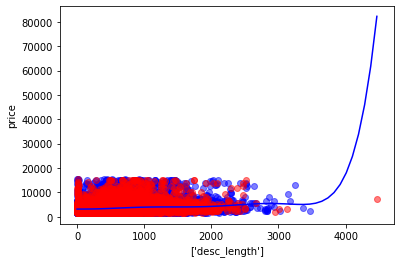

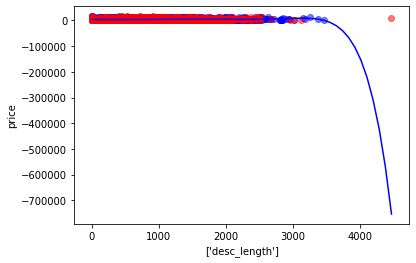

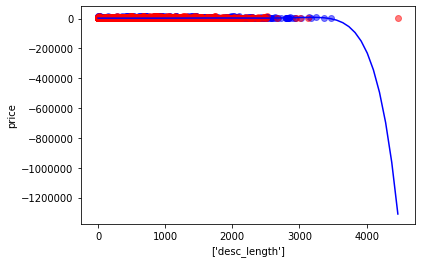

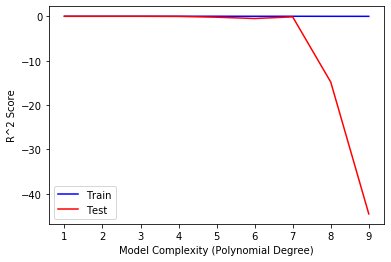

In [174]:
from IPython.display import display, HTML
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures


# Credit for PolynomialRegression: Jake VanderPlas, Python Data Science Handbook, Chapter 5.3
# https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html#Validation-curves-in-Scikit-Learn
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         LinearRegression(**kwargs))

polynomial_degrees = range(1, 10, 1)
train_r2s = []
test_r2s = []

for degree in polynomial_degrees:
    model = PolynomialRegression(degree)
    display(HTML(f'Polynomial degree={degree}'))
    
    model.fit(X_train, y_train)
    train_r2 = model.score(X_train, y_train)
    test_r2 = model.score(X_test, y_test)
    display(HTML(f'<b style="color: blue">Train R2 {train_r2:.2f}</b>'))
    display(HTML(f'<b style="color: red">Test R2 {test_r2:.2f}</b>'))

    plt.scatter(X_train, y_train, color='blue', alpha=0.5)
    plt.scatter(X_test, y_test, color='red', alpha=0.5)
    plt.xlabel(features)
    plt.ylabel(target)
    
    x_domain = np.linspace(X.min(), X.max())
    curve = model.predict(x_domain)
    plt.plot(x_domain, curve, color='blue')
    plt.show()
    display(HTML('<hr/>'))
    
    train_r2s.append(train_r2)
    test_r2s.append(test_r2)
    
display(HTML('Validation Curve'))
plt.plot(polynomial_degrees, train_r2s, color='blue', label='Train')
plt.plot(polynomial_degrees, test_r2s, color='red', label='Test')
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylabel('R^2 Score')
plt.legend()
plt.show()